Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for the video [Do UPPER CASE TITLES get more views? Causal inference, outliers and hypothesis testing](https://youtu.be/ZsYzhMgEwJg?si=T1exSDp4Ffg-0BeG)

Analysis of YouTube video data acquired after randomizing the capitalization of the titles, which shows that there is not a statistically significant difference between the videos with upper-case and mixed-case titles.\
Topics: [Causal inference](https://youtu.be/rjM2PCCDAUY?si=BDdEGz2pzKcJcQFf), [sensitivity of the mean to outliers](https://www.youtube.com/watch?v=Mgbphvi_E58), [permutation test, nonparametric testing](https://www.youtube.com/watch?v=frSkAi36qd0)

Author: Carlos Fernandez-Granda

In [1]:
import numpy as np
import csv
import urllib.request
import io
import matplotlib.pyplot as plt 
import random
import time

font_size = 15
font_size_legend = 15
font_size_ticks = 15

In [3]:
# Raw GitHub URL
url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/youtube_videos.csv"

# Initialize lists to store values
all_views = []
uppercase_only_views = []
mixed_case_views = []

# Read the CSV file
with urllib.request.urlopen(url) as response:
    f = io.TextIOWrapper(response, encoding='utf-8')
    reader = csv.reader(f)
    next(reader)  # Skip the header row
    
    for row in reader:

        string_part = row[0].strip()
        view_part = float(row[1])
        
        # Add to the general list of views
        all_views.append(view_part)

        # Classify the string and append accordingly
        if string_part.isupper():
            uppercase_only_views.append(view_part)
        elif any(c.islower() for c in string_part) and any(c.isupper() for c in string_part):
            mixed_case_views.append(view_part)

# Convert lists to numpy arrays
all_views = np.array(all_views)
uppercase_only_views = np.array(uppercase_only_views)
mixed_case_views = np.array(mixed_case_views)

# Output for debugging (optional)
print("All views:", all_views)
print("Uppercase only views:", uppercase_only_views)
print("Mixed case views:", mixed_case_views)

All views: [3523. 2240. 1483. 1330. 1013.  950.  852.  761.  718.  700.  669.  657.
  654.  616.  616.  610.  588.  581.  578.  549.  539.  537.  530.  507.
  503.  489.  479.  474.  447.  444.  444.  442.  442.  441.  419.  412.
  408.  406.  401.  385.  380.  375.  372.  367.  359.  341.  336.  335.
  329.  316.  301.  299.  281.  281.  279.  266.  261.  256.  251.  249.
  246.  244.  236.  214.  212.  198.  189.  184.  181.  178.  175.  174.
  173.  169.  169.  167.  166.  162.  160.  160.  156.  146.  145.  142.
  131.  125.  121.  112.  109.   95.   91.   85.   75.   71.   69.   68.
   67.   65.   64.   59.   58.   56.   53.   48.   48.   44.   43.   41.
   39.   38.   37.   32.   31.   29.   29.   28.   21.]
Uppercase only views: [2240. 1483. 1330. 1013.  950.  761.  700.  616.  616.  578.  549.  447.
  444.  442.  441.  419.  408.  401.  380.  375.  367.  336.  335.  316.
  279.  266.  261.  249.  244.  214.  212.  198.  181.  174.  173.  162.
  160.  146.  145.  142.  112.  109

In [4]:
print("Upper case")
print("Mean",np.round(np.mean(uppercase_only_views),2),"Median",np.round(np.median(uppercase_only_views),2))
print("Mixed case")
print("Mean",np.round(np.mean(mixed_case_views),2),"Median",np.round(np.median(mixed_case_views),2))

print("Without video with most views")
# Videos are ordered by number of views, so we can just remove the first
print("Upper case")
print("Mean",np.round(np.mean(uppercase_only_views[1:]),2),"Median",np.round(np.median(uppercase_only_views[1:]),2))
print("Mixed case")
print("Mean",np.round(np.mean(mixed_case_views[1:]),2),"Median",np.round(np.median(mixed_case_views[1:]),2))

Upper case
Mean 349.48 Median 229.0
Mixed case
Mean 359.81 Median 281.0
Without video with most views
Upper case
Mean 316.32 Median 214.0
Mixed case
Mean 305.28 Median 268.5


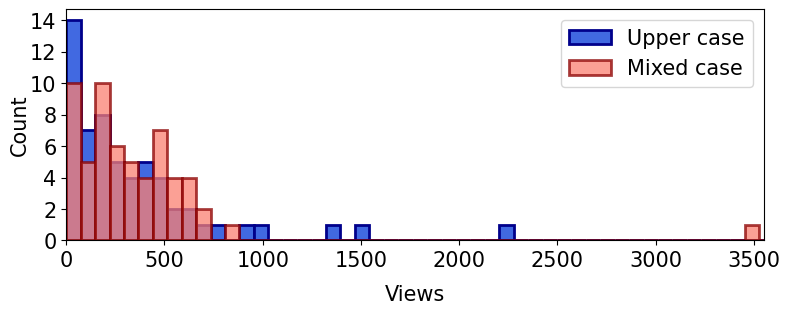

In [5]:
bins = np.linspace(0,3600,50)
plt.figure(figsize=(9,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(uppercase_only_views,bins=bins,
         color='royalblue', edgecolor='darkblue',
          linewidth=2,density=False,label="Upper case")
plt.hist(mixed_case_views,bins=bins,
         color='salmon', edgecolor='darkred',alpha=0.75,
          linewidth=2,density=False,label="Mixed case")
plt.xlabel("Views",fontsize=font_size,labelpad=10)
plt.ylabel("Count",fontsize=font_size,labelpad=0)
plt.xlim([0,3550])
plt.legend(fontsize=font_size,loc="upper right");

In [6]:
# Permutation test to evaluate absolute difference between medians
m = int(1e6)
n_upper = len(uppercase_only_views)
n_mixed = len(mixed_case_views)
views_copy = np.copy(all_views)

test_statistic_samples = np.zeros(m)
median_1 = np.zeros(m)
median_2 = np.zeros(m)
start = time.time()
for ind in range(m):
    random.shuffle(views_copy)
    test_statistic_samples[ind] = np.abs(np.median(views_copy[:n_upper])-np.median(views_copy[n_upper:]))
    if np.mod(ind,1e5)==0:
        end = time.time()
        print("Iteration", ind,"Time",np.round(end - start,2))

Iteration 0 Time 0.0
Iteration 100000 Time 4.3
Iteration 200000 Time 8.66
Iteration 300000 Time 13.02
Iteration 400000 Time 17.28
Iteration 500000 Time 21.55
Iteration 600000 Time 25.81
Iteration 700000 Time 30.12
Iteration 800000 Time 34.38
Iteration 900000 Time 38.7


t_data 52.0
P value:  0.422


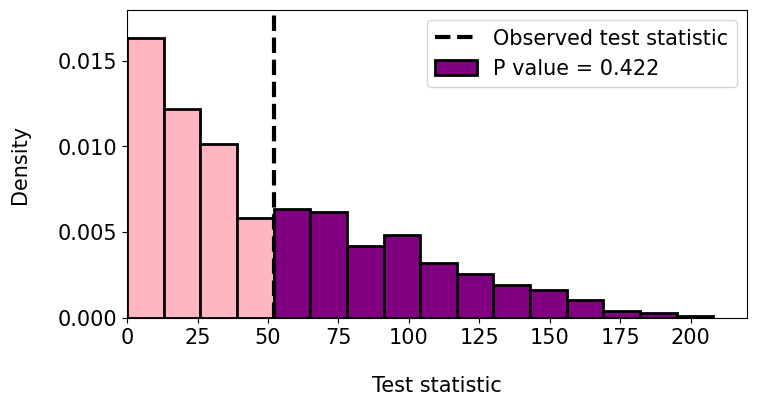

In [7]:
# P value computation
t_data = np.abs(np.median(uppercase_only_views) - np.median(mixed_case_views))
print("t_data",t_data)
vals, counts = np.unique(test_statistic_samples, return_counts=True)
prob = counts/len(test_statistic_samples)
p_value = np.round(np.sum(prob[vals >= t_data]),3)
print("P value: ",p_value)

# P value visualization
ymin = 0
ymax = 0.018

bins = np.arange(0, 221, 13)

# Compute histogram manually
hist, bin_edges = np.histogram(test_statistic_samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(8, 4))
plt.xticks(fontsize=font_size_ticks)
plt.yticks(np.arange(0, 0.02, 0.005),fontsize=font_size_ticks)

# Plot each bar with color depending on whether it's left or right of t_data
for i in range(len(hist)):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    color = 'lightpink' if right <= t_data else 'purple'
    if i == len(hist)-1:
        plt.bar(left, hist[i], width=right - left, align='edge',
            color=color, edgecolor='black', linewidth=2,label="P value = "+str(p_value))
    else:
        plt.bar(left, hist[i], width=right - left, align='edge',
            color=color, edgecolor='black', linewidth=2)

plt.xlabel("Test statistic", fontsize=font_size, labelpad=20)
plt.ylabel("Density", fontsize=font_size, labelpad=20)
plt.ylim([ymin, ymax])
plt.xlim([0, 220])
plt.vlines(t_data, ymin, ymax, linewidth=3, ls="--", color="black", label="Observed test statistic")
plt.legend(fontsize=font_size);